In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import statistics
import math

mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 14})

In [2]:
#t-score, % confidence interval 
t_score = 2.92 #90% confidence interval

[1.74246741 1.04456712 1.28901475]
[4.02881842 4.36006478 2.92205687]
[1.06485396 2.0600358  1.14809451]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:143: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


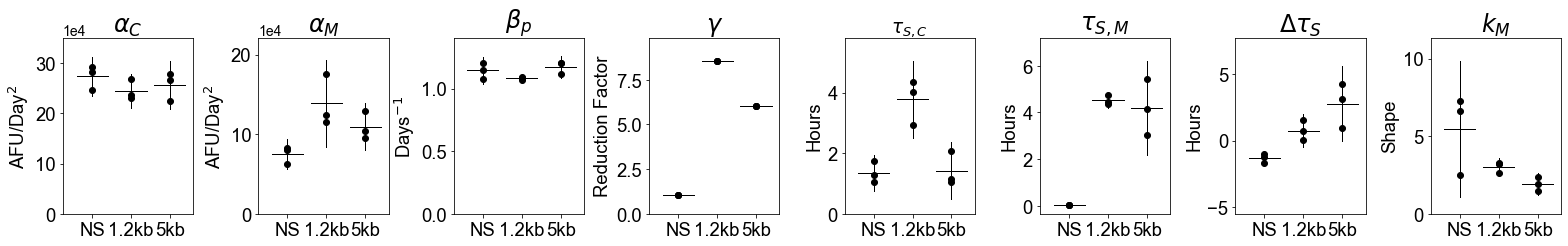

In [6]:
#replotted with bigger font 
# Cell lines to open
Lines = ['NS','1.2K','5K']
title = 'CHO KRAB Lambda Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_K' + Lines[i] + '_Final_Fits.pkl', 'rb')))

# creating figure
fig,ax = plt.subplots(1,8,constrained_layout=True,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0] 
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))

# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    print(tau_C)
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}}$',fontsize=18.5)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-5,7])
    #print(d_tau)
    #print(np.mean(d_tau))
    #print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5) 

# setting axes lims
xlabels = ['NS', '1.2kb', '5kb']
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(xlabels,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize=18.5)
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)

fig.subplots_adjust(wspace=0.5, hspace=0.5)
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[322.01554345 201.21628379]
261.6159136180728
85.24899451957964 437.98283271656595
[118.82069182 140.7680348 ]
129.79436331128895
97.75124255065965 161.83748407191825


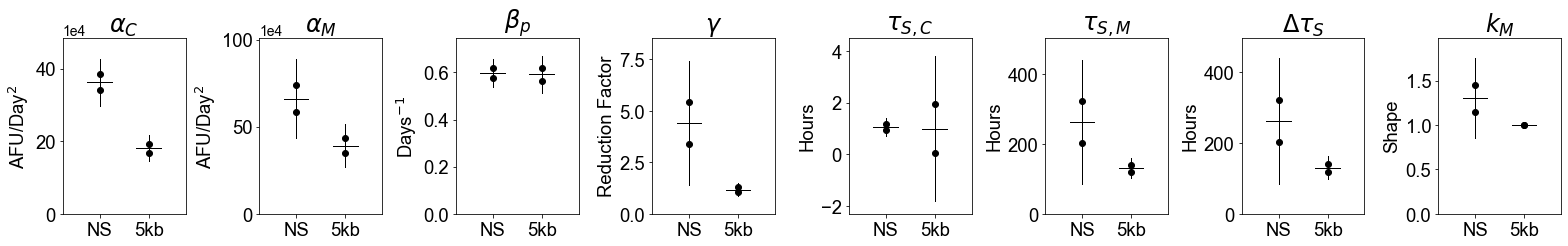

In [114]:
#replotted with bigger font 
# Cell lines to open
Lines = ['NS','5K']
title = 'K562 HDAC Lambda Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('K562_H' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.25,i+0.25],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.25,i+0.25],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.25,i+0.25],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[3].plot([i-0.25,i+0.25],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.25,i+0.25],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.25,i+0.25],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[6].plot([i-0.25,i+0.25],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([0,450])
    print(d_tau)
    print(np.mean(d_tau))
    print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[7].plot([i-0.25,i+0.25],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5) 

# setting axes lims
xlabels = ['NS', '5kb']
for axis in ax:
    axis.set_xlim((-0.75,n-0.25))
    axis.set_xticklabels(xlabels,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)
    
# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title, horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.6, hspace=0.6)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[40.59518415 60.69580167 73.85623615]
58.38240732299355
30.1429103341752 86.6219043118119
[38.78600971 78.17576374 47.84407126]
54.93528157241477
20.15571866883925 89.7148444759903
[45.19773354 44.47519214 43.91626835]
44.529731343969566
43.44661317830544 45.61284950963369


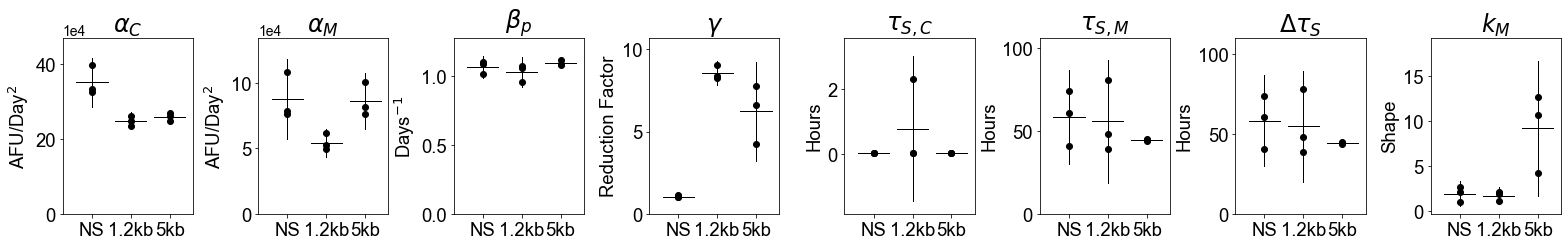

In [17]:
#replotted with bigger font 
# Cell lines to open
Lines = ['NS','1.2K','5K']
title = 'CHO HDAC Lambda Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_H' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([0,100])
    print(d_tau)
    print(np.mean(d_tau))
    print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5) 

# setting axes lims
xlabels = ['NS', '1.2kb', '5kb']
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(xlabels,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[42.4022115  69.97310856 79.55610331]
63.977141119858544
31.45848501719992 96.49579722251717
[52.11677789 62.87581277 85.79527025]
66.92928697057559
37.930329911582675 95.9282440295685
[53.70812295 75.57669229 78.0379474 ]
69.10758754774896
46.52885069369637 91.68632440180156
[49.1818944  59.90810288 70.50797418]
59.86599048555835
41.889463204460924 77.84251776665577


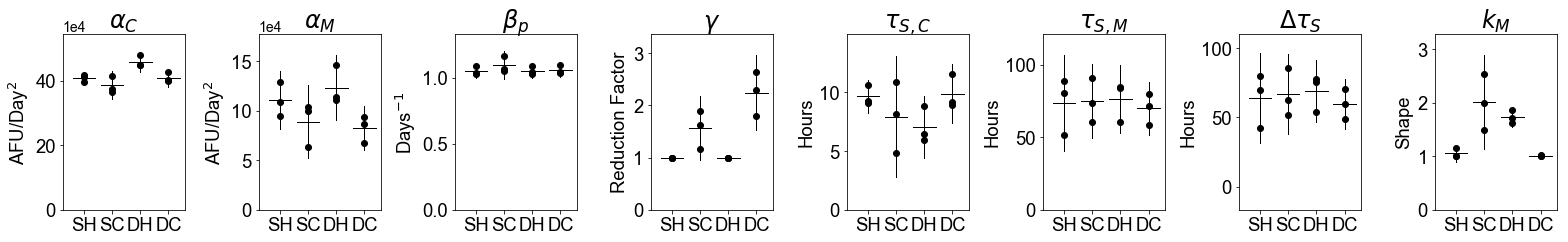

In [3]:
#replotted with bigger font 
# Cell lines to open
Lines = ['SH','SC','DH','DC']
title = 'CHO HDAC Insulators Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_H' + Lines[i] + '_MC_Final_Fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-15,100])
    print(d_tau)
    print(np.mean(d_tau))
    print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)  
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5) 

# setting axes lims
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(Lines,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.6, hspace=0.6)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[4.02119457 1.60103695 0.67883688]
2.1003561315509987
-0.8098104943707756 5.010522757472772
[13.4904428   7.81986658 18.56224419]
13.290851190302059
4.231076217614675 22.350626162989442


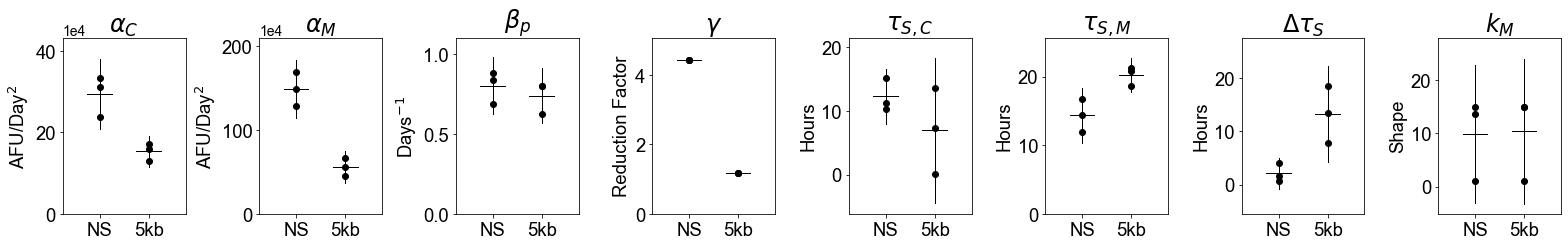

In [117]:
#replotted with bigger font 
# Cell lines to open
Lines = ['NS','5K']
title = 'K562 KRAB Lambda Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('K562_K' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.25,i+0.25],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.25,i+0.25],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.25,i+0.25],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)  
    ax[3].plot([i-0.25,i+0.25],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.25,i+0.25],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.25,i+0.25],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)  
    ax[6].plot([i-0.25,i+0.25],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-5,25])
    print(d_tau)
    print(np.mean(d_tau))
    print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[7].plot([i-0.25,i+0.25],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5)  

# setting axes lims
xlabels = ['NS', '5kb']
for axis in ax:
    axis.set_xlim((-0.75,n-0.25))
    axis.set_xticklabels(xlabels,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

# tight layout
plt.tight_layout()

# setting overall title and x axis label
# fig.text(0.5,1,title,
#          horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.6, hspace=0.6)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[1.18750235 1.13023128 1.54129521]
1.2863429488830267
0.9109951990783949 1.6616906986876585
[7.53570395 4.52424552 5.50558071]
5.855176726215647
3.2659178640482796 8.444435588383014
[-2.46345369 -0.92572737  0.20368997]
-1.0618303642278812
-3.3188139698746917 1.1951532414189292
[8.40396911 6.38234421 5.49046869]
6.758927337532778
4.242254163103016 9.275600511962539


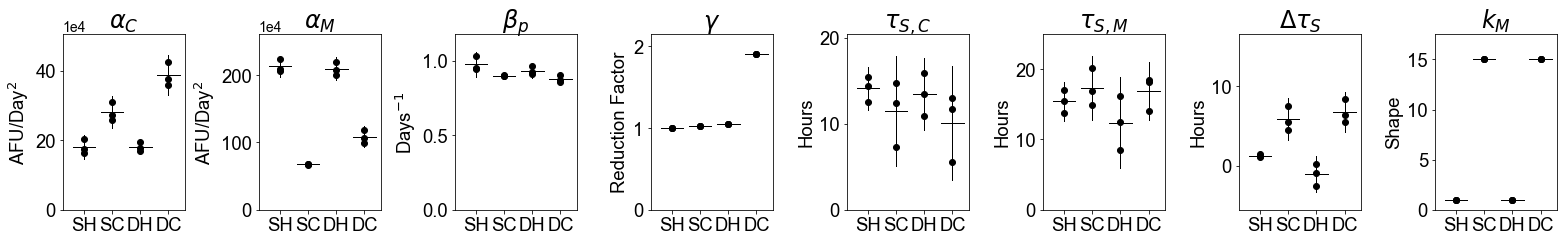

In [9]:
#replotted with bigger font 
# Cell lines to open
Lines = ['SH','SC','DH','DC']
title = 'K562 KRAB Insulators Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('K562_K' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1) 
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)  
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-5,15])
    print(d_tau)
    print(np.mean(d_tau))
    print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5)  

# setting axes lims
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(Lines,rotation='horizontal',fontsize=18.5)
    
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title, horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.6, hspace=0.6)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[ 1.6131535  -6.0978102  -8.58785438]
-4.357503692429306
-13.323796335884857 4.608788951026245
[-0.32987428 -4.20640528 -8.34728822]
-4.294522594520265
-11.053876920917027 2.4648317318764983
[ 6.06289338 -2.58163999 -5.83606261]
-0.784936404512985
-11.15229298266236 9.58242017363639
[-0.5161224  -0.43594517 -7.8129402 ]
-2.921669256800163
-10.063244623880397 4.219906110280071


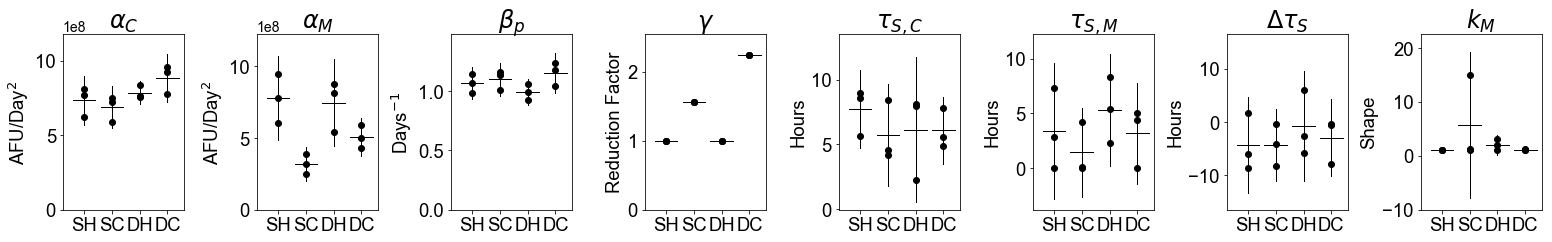

In [13]:
#replotted with bigger font 
# Cell lines to open
Lines = ['SH','SC','DH','DC']
title = 'CHO KRAB Insulators Best Fit Parameters with 90% CI'

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_K' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(8,8))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(8,8))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1) 
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-15,15])
    print(d_tau)
    print(np.mean(d_tau))
    print(lower_CI, upper_CI)
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5) 

# setting axes lims
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(Lines,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  
 
fig.subplots_adjust(wspace=0.6, hspace=0.6)  
                         
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

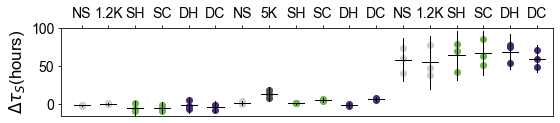

In [24]:
# all ins main panels in one plot with NS added 

# creating array to store opened data from each line
data = []

#####CHO KRAB 
# Cell lines to open
Lines = ['NS','1.2K','SH','SC','DH','DC']
title = 'CHO KRAB Insulators Best Fit Parameters with 1.2kb Lambda with 90% CI'
# number of lines
n = np.size(Lines)
# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_K' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    
####K562 KRAB  
# Cell lines to open
Lines = ['NS','5K','SH','SC','DH','DC']
title = 'K562 KRAB Insulators Best Fit Parameters with NS and 5kb Lambda with 90% CI'
# number of lines
n = np.size(Lines)
# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('K562_K' + Lines[i] + '_Final_Fits.pkl', 'rb')))

#### CHO HDAC4     
# Cell lines to open
Lines = ['NS','1.2K','SH','SC','DH','DC']
title = 'CHO HDAC Insulators Best Fit Parameters with 1.2kb Lambda with 90% CI'
# number of lines
n = np.size(Lines)
# loading data for each cell line
for i in np.arange(n):
    if i == 0:
        data.append(pickle.load(open('CHO_H' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    elif i == 1:
        data.append(pickle.load(open('CHO_H' + Lines[i] + '_Final_Fits.pkl', 'rb')))
    else:
        data.append(pickle.load(open('CHO_H' + Lines[i] + '_MC_Final_Fits.pkl', 'rb')))
    
    
#### all lines 
Lines = ['CHO_KNS','CHO_K1.2K','CHO_KSH','CHO_KSC','CHO_KDH','CHO_KDC','K562_NS','K562_5K','K562_SH','K562_SC','K562_DH','K562_DC', 'CHO_HNS','CHO_H1.2K','CHO_HSH','CHO_HSC','CHO_HDH', 'CHO_HDC']
n = np.size(Lines)
colormap = ["#CCCCCC","#CCCCCC", "#6DB14B", "#6DB14B", "#472C78", "#472C78", "#CCCCCC", "#505050", "#6DB14B", "#6DB14B", "#472C78", "#472C78", "#CCCCCC", "#CCCCCC","#6DB14B", "#6DB14B", "#472C78", "#472C78"]


# creating figure
fig,ax = plt.subplots(1,1,figsize=(8,2))

# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax.scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color= colormap[i])
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax.plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)   
    ax.plot([i-0.3,i+0.3],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax.axes.set_ylim([-15,100])
#ax.set_title(r'$\Delta\tau_S$',fontsize='x-large')
ax.set_ylabel(r'$\Delta\tau_S$'+'(hours)',fontsize='large');

# setting axes lims
xticks = ['NS','1.2K','SH','SC','DH','DC','NS','5K','SH','SC','DH','DC','NS','1.2K','SH','SC','DH','DC']
ax.set_xlim((-0.75,n-0.4))
ax.set_xticklabels(xticks,rotation='horizontal',fontsize='medium')
ax.xaxis.tick_top()
ylim = ax.get_ylim()
ax.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
ax.set_ylim((-15,100))

# tight layout
plt.tight_layout()

# setting labels
fig.subplots_adjust(top=0.83)
fig.subplots_adjust(bottom=0.22)  

    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig('INS_delta_tau_CHOKRAB_K562KRAB_CHOHDAC4_withNS'+'.pdf', bbox_inches='tight', transparent=True)
plt.show()


[103.70161279  40.94561014 102.18459267]
82.27727186446587
[ 86.30221646 103.70161279 119.99999957]
103.33460960453426
[110.5127166   94.4835425   69.64156322]
91.54594077465488
[ 73.20879171 135.71211112 136.42183223]
115.11424501831652


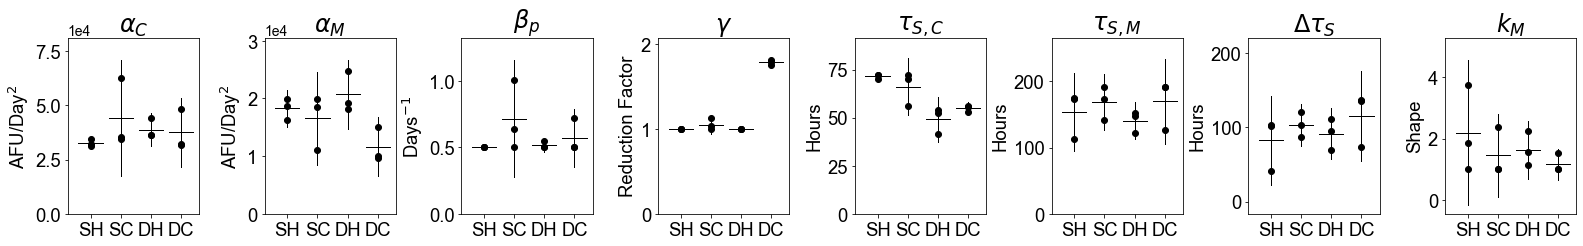

In [3]:
#replotted with bigger font 
# Cell lines to open
Lines = ['SH','SC','DH','DC']
title = 'CHO HDAC Insulators 100 dox Best Fit Parameters with 90% CI' 

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_H' + Lines[i] + '_100dox_fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-15,200])
    print(d_tau)
    print(np.mean(d_tau))
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5)  

# setting axes lims
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(Lines,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

#ax[6].set_ylim((-5,25))

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[66.61282198 86.07753175 71.56917032]
74.75317468343654
[54.50791039 85.00729174 83.62143394]
74.37887868992907
[74.51775794 96.72287424 69.39188366]
80.21083861092605
[56.19762388 88.68864642 79.58290132]
74.82305720674755


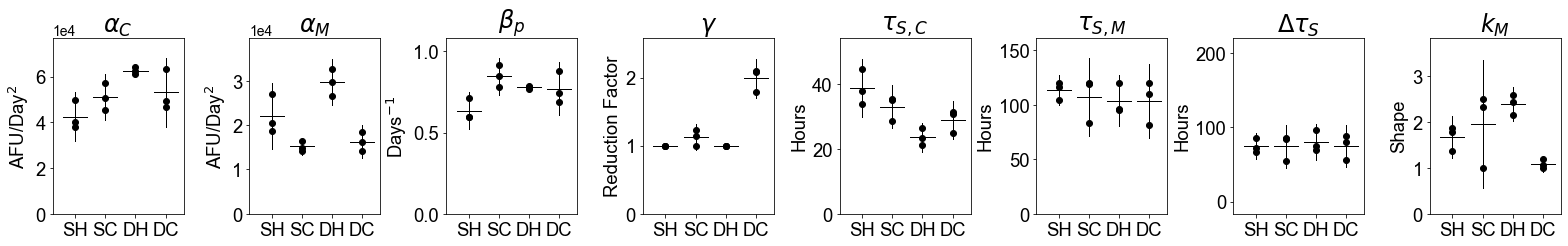

In [4]:
#replotted with bigger font 
# Cell lines to open
Lines = ['SH','SC','DH','DC']
title = 'CHO HDAC Insulators 200 dox Best Fit Parameters with 90% CI' 

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_H' + Lines[i] + '_200dox_fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-15,200])
    print(d_tau)
    print(np.mean(d_tau))
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5)  

# setting axes lims
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(Lines,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

#ax[6].set_ylim((-5,25))

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()

[33.79295949 55.83815624 56.57789311]
48.73633627989673
[28.25148188 71.01206398 69.56535418]
56.276300012066166
[48.98759003 62.40154909 51.53180104]
54.30698005416526
[38.95976112 83.21086169 68.44060258]
63.53707513202187


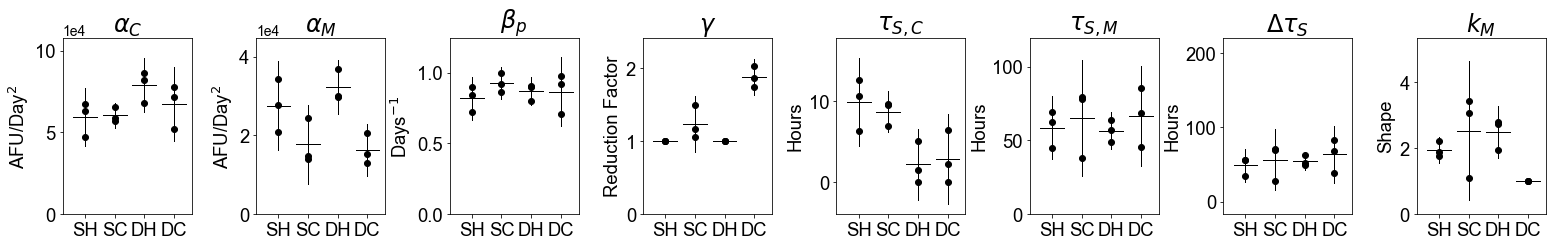

In [5]:
#replotted with bigger font 
# Cell lines to open
Lines = ['SH','SC','DH','DC']
title = 'CHO HDAC Insulators 1000 dox Best Fit Parameters with 90% CI' 

# number of lines
n = np.size(Lines)

# creating array to store opened data from each line
data = []

# loading data for each cell line
for i in np.arange(n):
    data.append(pickle.load(open('CHO_H' + Lines[i] + '_1000dox_fits.pkl', 'rb')))
    
# creating figure
fig,ax = plt.subplots(1,8,figsize=(22,4))

# plotting alpha for Cit
for i in np.arange(n):
    alpha_C = np.array(list(data[i][0].values()))[:,0]
    #plot points
    ax[0].scatter(np.repeat(Lines[i],np.size(alpha_C)),alpha_C,color='k')
    #calculate and plot confidence interval 
    sample_sd = statistics.stdev(alpha_C)
    lower_CI = np.mean(alpha_C) - t_score*sample_sd/math.sqrt(len(alpha_C))
    upper_CI = np.mean(alpha_C) + t_score*sample_sd/math.sqrt(len(alpha_C))
    ax[0].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    #plot mean bar 
    ax[0].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_C),2),color='k',lw=1)
ax[0].set_title(r'$\alpha_C$',fontsize=24)
ax[0].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting alpha for mCh
for i in np.arange(n):
    alpha_m = np.array(list(data[i][1].values()))[:,0]
    ax[1].scatter(np.repeat(Lines[i],np.size(alpha_m)),alpha_m,color='k')
    sample_sd = statistics.stdev(alpha_m)
    lower_CI = np.mean(alpha_m) - t_score*sample_sd/math.sqrt(len(alpha_m))
    upper_CI = np.mean(alpha_m) + t_score*sample_sd/math.sqrt(len(alpha_m))
    ax[1].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[1].plot([i-0.4,i+0.4],np.repeat(np.mean(alpha_m),2),color='k',lw=1)
ax[1].set_title(r'$\alpha_M$',fontsize=24)
ax[1].set_ylabel(r'AFU/Day$^2$',fontsize=18.5)
ax[1].ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    
# plotting beta for Cit (same for mCh)
for i in np.arange(n):
    beta = np.array(list(data[i][0].values()))[:,1]
    ax[2].scatter(np.repeat(Lines[i],np.size(beta)),beta,color='k')
    sample_sd = statistics.stdev(beta)
    lower_CI = np.mean(beta) - t_score*sample_sd/math.sqrt(len(beta))
    upper_CI = np.mean(beta) + t_score*sample_sd/math.sqrt(len(beta))
    ax[2].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)
    ax[2].plot([i-0.4,i+0.4],np.repeat(np.mean(beta),2),color='k',lw=1)
ax[2].set_title(r'$\beta_p$',fontsize=24)
ax[2].set_ylabel(r'Days$^{-1}$',fontsize=18.5)
    
# plotting gamma for mCh (none for Cit)
for i in np.arange(n):
    gamma = np.array(list(data[i][1].values()))[:,2]
    ax[3].scatter(np.repeat(Lines[i],np.size(gamma)),gamma,color='k')
    sample_sd = statistics.stdev(gamma)
    lower_CI = np.mean(gamma) - t_score*sample_sd/math.sqrt(len(gamma))
    upper_CI = np.mean(gamma) + t_score*sample_sd/math.sqrt(len(gamma))
    ax[3].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[3].plot([i-0.4,i+0.4],np.repeat(np.mean(gamma),2),color='k',lw=1)
ax[3].set_title(r'$\gamma$',fontsize=24)
ax[3].set_ylabel('Reduction Factor',fontsize=18.5)
    
# plotting tau for Cit
for i in np.arange(n):
    tau_C = np.array(list(data[i][0].values()))[:,5]
    tau_C = tau_C*24
    ax[4].scatter(np.repeat(Lines[i],np.size(tau_C)),tau_C,color='k')
    sample_sd = statistics.stdev(tau_C)
    lower_CI = np.mean(tau_C) - t_score*sample_sd/math.sqrt(len(tau_C))
    upper_CI = np.mean(tau_C) + t_score*sample_sd/math.sqrt(len(tau_C))
    ax[4].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[4].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_C),2),color='k',lw=1)
ax[4].set_title(r'$\tau_{S,C}$',fontsize=24)
ax[4].set_ylabel('Hours',fontsize=18.5)
    
# plotting tau for mCh
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_m = tau_m*24
    ax[5].scatter(np.repeat(Lines[i],np.size(tau_m)),tau_m,color='k')
    sample_sd = statistics.stdev(tau_m)
    lower_CI = np.mean(tau_m) - t_score*sample_sd/math.sqrt(len(tau_m))
    upper_CI = np.mean(tau_m) + t_score*sample_sd/math.sqrt(len(tau_m))
    ax[5].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[5].plot([i-0.4,i+0.4],np.repeat(np.mean(tau_m),2),color='k',lw=1)
ax[5].set_title(r'$\tau_{S,M}$',fontsize=24)
ax[5].set_ylabel('Hours',fontsize=18.5)
    
# plotting delta tau
for i in np.arange(n):
    tau_m = np.array(list(data[i][1].values()))[:,5]
    tau_C = np.array(list(data[i][0].values()))[:,5]
    d_tau = tau_m - tau_C
    d_tau = d_tau*24
    ax[6].scatter(np.repeat(Lines[i],np.size(d_tau)),d_tau,color='k')
    sample_sd = statistics.stdev(d_tau)
    lower_CI = np.mean(d_tau) - t_score*sample_sd/math.sqrt(len(d_tau))
    upper_CI = np.mean(d_tau) + t_score*sample_sd/math.sqrt(len(d_tau))
    ax[6].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[6].plot([i-0.4,i+0.4],np.repeat(np.mean(d_tau),2),color='k',lw=1)
    ax[6].axes.set_ylim([-15,200])
    print(d_tau)
    print(np.mean(d_tau))
ax[6].set_title(r'$\Delta\tau_S$',fontsize=24)
ax[6].set_ylabel('Hours',fontsize=18.5)

# plotting k for mCh
for i in np.arange(n):
    k_m = np.array(list(data[i][1].values()))[:,4]
    ax[7].scatter(np.repeat(Lines[i],np.size(k_m)),k_m,color='k')
    sample_sd = statistics.stdev(k_m)
    lower_CI = np.mean(k_m) - t_score*sample_sd/math.sqrt(len(k_m))
    upper_CI = np.mean(k_m) + t_score*sample_sd/math.sqrt(len(k_m))
    ax[7].plot(np.repeat(Lines[i],2),[lower_CI, upper_CI],color='k',lw=1)    
    ax[7].plot([i-0.4,i+0.4],np.repeat(np.mean(k_m),2),color='k',lw=1)
ax[7].set_title(r'$k_M$',fontsize=24)
ax[7].set_ylabel('Shape',fontsize=18.5)  

# setting axes lims
for axis in ax:
    axis.set_xlim((-0.75,n-0.4))
    axis.set_xticklabels(Lines,rotation='horizontal',fontsize=18.5)
    
# setting axes lims
for axis in ax:
    ylim = axis.get_ylim()
    axis.set_ylim((np.min((ylim[0]*1.1,0)),ylim[1]*1.1))
    axis.tick_params(axis='y', labelsize=18.5)

#ax[6].set_ylim((-5,25))

# tight layout
plt.tight_layout()

# setting overall title and x axis label
#fig.text(0.5,1,title,horizontalalignment='center',verticalalignment='top',fontsize='xx-large')
fig.subplots_adjust(top=0.83)
#fig.text(0.5,0,'Spacer Length/Geometry',horizontalalignment='center',verticalalignment='bottom',fontsize=18.5)
fig.subplots_adjust(bottom=0.22)  

fig.subplots_adjust(wspace=0.5, hspace=0.5)
# saving fig
#plt.savefig(title+'.png',dpi=300)
#plt.savefig(title+'.eps',format='eps')
plt.savefig(title+'.pdf', transparent=True)
plt.show()